In [11]:
import numpy as np
import matplotlib.pyplot as plt

# supervised learning setup
# simulate house price by cs229 lecture note
np.random.seed(42)
m = 100                     # total sample
X = 2 * np.random.rand(m,1) # land area ( small scale )
y = 4 + 3 *X + np.random.rand(m,1) # target

# bias track ( intercept)
X_b = np.c_[np.ones((m,1)), X]

print(f"dataset: {m} training examples")
print("shape x_b :", {X_b.shape})

dataset: 100 training examples
shape x_b : {(100, 2)}


In [12]:
# model from scratch 

def hypotesis(X, theta):
    # h(X) theta^T * X
    return X.dot(theta)

def compute_cost(X,y,theta):
    m = len(y)
    #lms  cost function
    predictions = hypotesis(X, theta)
    errors = predictions - y
    return (1/(2*m)) * np.sum(errors**2)

def gradient_descent(X, y, theta , alpha , n_iterations):
    m = len(y)
    cost_history = []
    theta_history = []
    
    for i in range(n_iterations):
        preds = hypotesis(X, theta)
        errors = preds - y
        gradients = (1/m) * X.T.dot(errors)
        theta = theta - alpha * gradients
        
        cost_history.append(compute_cost(X, y , theta))
        theta_history.append(theta.copy()) # save coppy of current data 
        
    return theta , cost_history, np.array(theta_history)
        

In [13]:
# training loop 

theta_init = np.array([[0], [0]]) # start from 0,0 to visualize the path
alpha = 0.1
n_iterations = 1000

print("training")
theta_final, history, theta_history = gradient_descent(X_b, y, theta_init, alpha, n_iterations)

print("\n final theta", theta_final.ravel())

training

 final theta [4.51359762 2.98323421]


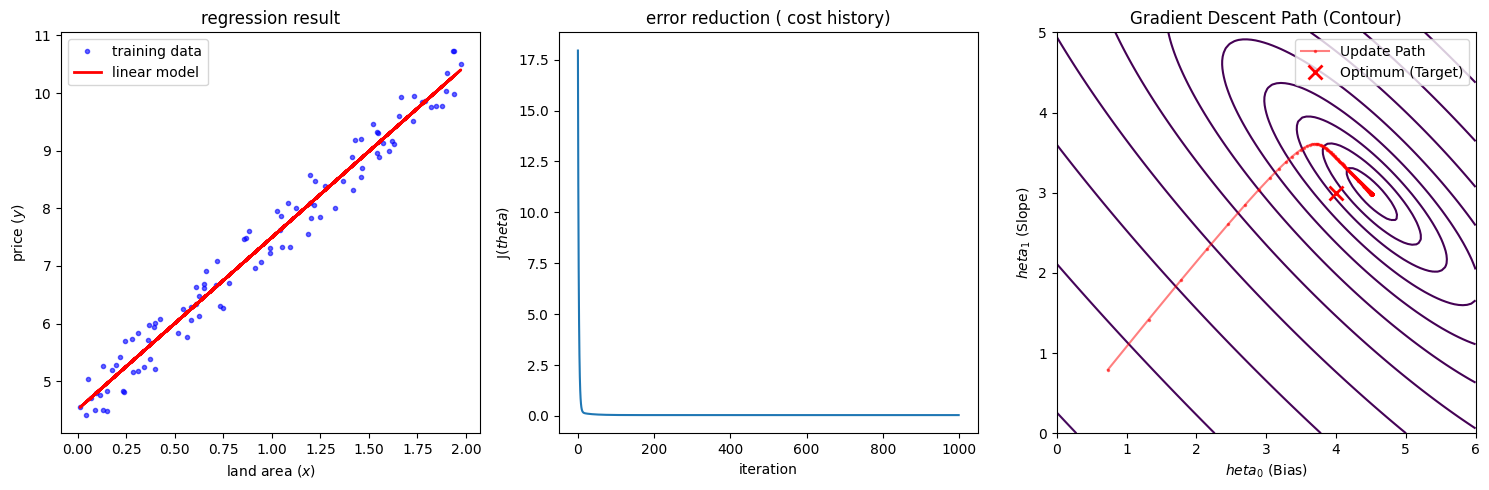

In [27]:
#  viusalisasi hasil dan contour plot
plt.figure(figsize=(15,5))

# plit a : data dan fit
plt.subplot(1,3,1)
plt.plot(X, y, "b.",alpha=0.6, label='training data')
plt.plot(X, X_b.dot(theta_final), "r-", linewidth=2, label='linear model')
plt.xlabel('land area ($x$)')
plt.ylabel('price ($y$)')
plt.title('regression result')
plt.legend()

# plot b : cost history
plt.subplot(1,3,2)
plt.plot(history)
plt.xlabel('iteration')
plt.ylabel('J($\ttheta$)')
plt.title('error reduction ( cost history)')

# plot c : contour plot ( mountain descent)
plt.subplot(1,3,3)

# grid theta0 dan theta1
t0_range = np.linspace(0, 6, 100)
t1_range = np.linspace(0, 5, 100)
T0, T1 = np.meshgrid(t0_range, t1_range)
J_vals = np.zeros(T0.shape)

# hitung cost untuk setiap kombinasi theta di grid
for i in range(len(t0_range)):
    for j in range(len(t1_range)):
        t = np.array([[t0_range[i]], [t1_range[j]]])
        J_vals[j, i] = compute_cost(X_b, y, t) # Note index j, i order
        

# plot 
plt.contour(T0, T1, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
plt.xlabel("$\theta_0$ (Bias)")
plt.ylabel("$\theta_1$ (Slope)")
plt.title("Gradient Descent Path (Contour)")

# 4. Plot Perjalanan Theta (Sejarah Update)
plt.plot(theta_history[:, 0], theta_history[:, 1], 'r.-', alpha=0.5, markersize=3, label='Update Path')
plt.plot(4, 3, 'rx', markersize=10, markeredgewidth=2, label='Optimum (Target)') # Mark target
plt.legend()

plt.tight_layout()
plt.show()
